# Principal Component Analysis

## import library

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [97]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]
print(feature)
print(x)
print(y)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

[[3.38156 3.38911]
 [4.52788 5.85418]
 [2.65568 4.41199]
 [2.76523 3.71541]
 [2.84656 4.17551]
 [3.89067 6.48838]
 [3.47581 3.63285]
 [5.9113  6.68077]
 [3.92889 5.09845]
 [4.56184 5.6233 ]
 [4.57407 5.39765]
 [4.37173 5.46117]
 [4.19169 4.95469]
 [5.24409 4.66149]
 [2.83584 3.76802]
 [5.63527 6.31211]
 [4.68633 5.66524]
 [2.85051 4.62646]
 [5.11016 7.3632 ]
 [5.18256 4.64651]
 [5.70733 6.68104]
 [3.57968 4.80278]
 [5.63938 6.12044]
 [4.26347 4.68943]
 [2.53652 3.88449]
 [3.22383 4.94256]
 [4.92949 5.95502]
 [5.79296 5.10839]
 [2.81685 4.81896]
 [3.88882 5.10037]
 [3.34323 5.89301]
 [5.87973 5.52142]
 [3.10392 3.8571 ]
 [5.33151 4.68074]
 [3.37543 4.56538]
 [4.77668 6.25435]
 [2.67575 3.73097]
 [5.50028 5.67948]
 [1.7971  3.24754]
 [4.32251 5.1111 ]
 [4.421   6.02564]
 [3.1793  4.43686]
 [3.03354 3.97879]
 [4.60935 5.87979]
 [2.96379 3.30025]
 [3.97176 5.40774]
 [1.18023 2.87869]
 [1.91895 5.07108]
 [3.95525 4.50533]
 [5.11795 6.08507]]
[3.38156 4.52788 2.65568 2.76523 2.84656 3.89067 

## plot the input data

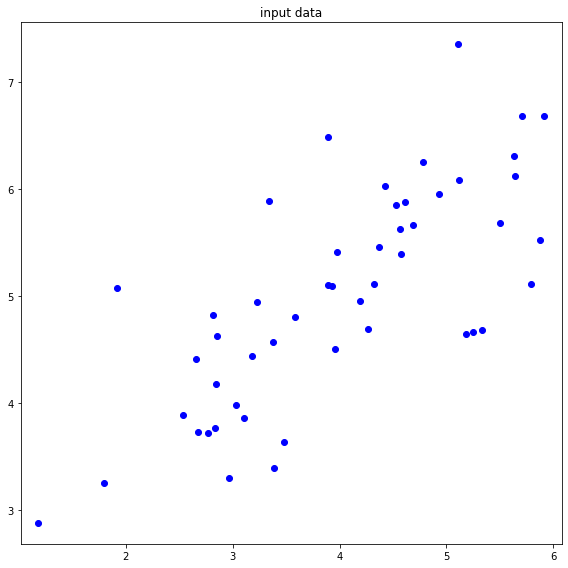

In [98]:
plt.figure(figsize=(8,8))   
plt.title('input data')


plt.scatter(x,y, c="b", marker="o")


plt.axis('equal')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

In [99]:
x_m , y_m = np.mean(feature,axis=0)
#print('m',x_m,y_m)
x_std, y_std = np.std(feature,axis=0)
#print('s',x_std,y_std)
x = (x-x_m)/x_std
y = (y-y_m)/y_std

n_feature = np.zeros((number_data,number_feature))
n_feature[:,0]=x
n_feature[:,1]=y

def plot_normalization_point(feature,x,y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    plt.scatter(x,y, c="b", marker="o")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    return feature

m 3.989265199999999 5.002806
s 1.161260585149156 1.0131222834742113


## compute covariance matrix

In [100]:
def compute_covariance(feature):
    
    Sigma = (1/number_data) * np.dot(feature.T,feature)
    
    return Sigma

## compute principal directions

In [101]:
def compute_eigen(X):
    
    S,U = np.linalg.eig(X)

    return S, U

In [102]:

Sigma = compute_covariance(n_feature)
#print(Sigma)
#print(np.cov(feature, rowvar = False))
#print()
S,U = compute_eigen(Sigma)
idx = S.argsort()[::-1]
S=S[idx]
U = U[:,idx]

#print('s',S)
#print(U)
#print()
#print(U[:,np.argmax(S)])
#print(U[:,np.argmin(S)])

#first_eig_vec = U[:,np.argmax(S)]
#second_eig_vec = U[:,np.argmin(S)]
first_eig_vec = U[:,0]
second_eig_vec = U[:,1]

In [103]:
def principal_direction(feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    
    plt.arrow(0, 0, S[0]*first_eig_vec[0], S[0]*first_eig_vec[1],  head_width = 0.1, head_length = 0.2,color = 'red')
    plt.arrow(0, 0, S[1]*second_eig_vec[0], S[1]*second_eig_vec[1],   head_width = 0.1, head_length = 0.2, color = 'green')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()


## first principal axis

In [104]:
def first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')

    plt.tight_layout()
    plt.show()

## second principal axis

In [105]:
def second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    plt.scatter(feature[:,0],feature[:,1], c="b", marker="o")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')

    plt.tight_layout()
    plt.show()

## compute the projection of point onto the line

In [106]:
def compute_projection_onto_line(feature, vector):
    vector_norm2 = np.dot(vector.T,vector)
    
    projection = np.zeros((number_data,number_feature))
    for i in range(number_data):
        projection[i]=(np.dot(feature[i],vector)/vector_norm2)*vector

    
    return projection

## projcet to the first principal axis

In [107]:
def projection_to_the_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    projection_first_data = compute_projection_onto_line(feature,first_eig_vec)
    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')
    plt.scatter(projection_first_data[:,0],projection_first_data[:,1], c="g", marker="o")



    plt.tight_layout()
    plt.show()

## projcet to the second principal axis

In [108]:
def projection_to_the_second_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    projection_second_data = compute_projection_onto_line(feature,second_eig_vec)

    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')
    plt.scatter(projection_second_data[:,0],projection_second_data[:,1], c="g", marker="o")


    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the first principal axis

In [109]:
def connect_original_data_to_the_projection_onto_the_first_principal_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    projection_first_data = compute_projection_onto_line(feature,first_eig_vec)
    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-4*first_eig_vec[0],-4*first_eig_vec[1], 7*first_eig_vec[0], 7*first_eig_vec[1],  color = 'red')
    plt.scatter(projection_first_data[:,0],projection_first_data[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([feature[i,0],projection_first_data[i,0]],[feature[i,1],projection_first_data[i,1]],c = 'gray')


    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the second principal axis

In [110]:
def connect_original_data_to_the_projection_onto_the_second_principal_axis(feature):

    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    projection_second_data = compute_projection_onto_line(feature,second_eig_vec)
    plt.scatter(x,y, c="b", marker=".")
    plt.arrow(-3*second_eig_vec[0],-3*second_eig_vec[1], 6*second_eig_vec[0], 6*second_eig_vec[1],  color = 'red')
    plt.scatter(projection_second_data[:,0],projection_second_data[:,1], c="g", marker="o")

    for i in range(number_data):
        plt.plot([feature[i,0],projection_second_data[i,0]],[feature[i,1],projection_second_data[i,1]],c = 'gray')


    plt.tight_layout()
    plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

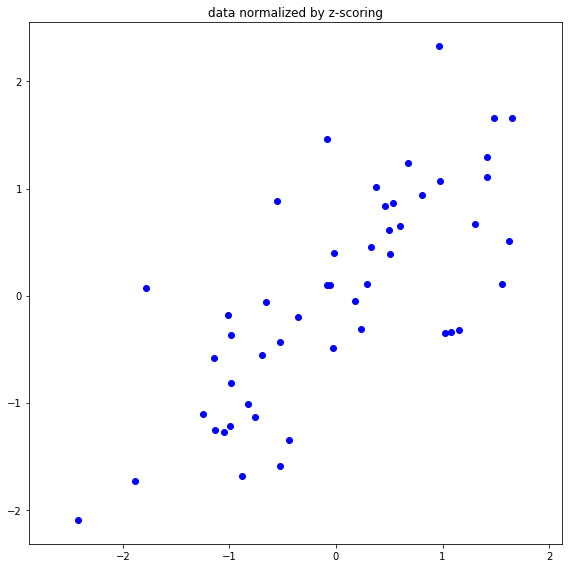

array([[-0.5233151 , -1.59279489],
       [ 0.46381907,  0.84034673],
       [-1.14839444, -0.58316356],
       [-1.0540573 , -1.27072124],
       [-0.98402134, -0.8165806 ],
       [-0.0849036 ,  1.46633237],
       [-0.4421533 , -1.35221189],
       [ 1.65512791,  1.65623047],
       [-0.05199109,  0.09440519],
       [ 0.49306315,  0.61245716],
       [ 0.50359481,  0.38972985],
       [ 0.32935312,  0.45242712],
       [ 0.17431471, -0.04749279],
       [ 1.08057125, -0.33689517],
       [-0.99325269, -1.21879266],
       [ 1.41742932,  1.29234548],
       [ 0.60026562,  0.65385394],
       [-0.98061987, -0.37147145],
       [ 0.96523968,  2.32982142],
       [ 1.02758572, -0.35168114],
       [ 1.47948257,  1.65649698],
       [-0.3527074 , -0.1974352 ],
       [ 1.42096858,  1.10315805],
       [ 0.23612685, -0.30931705],
       [-1.25100707, -1.10383121],
       [-0.65914163, -0.05946567],
       [ 0.80965876,  0.93988062],
       [ 1.55322141,  0.10421644],
       [-1.00960561,

In [111]:
plot_normalization_point(n_feature,x,y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

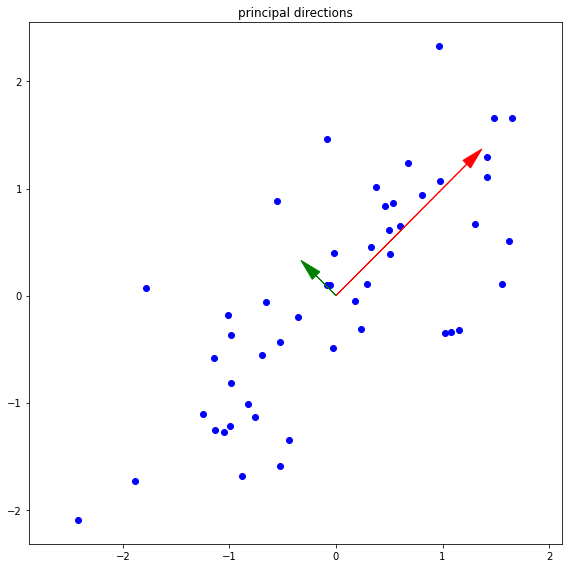

In [112]:
principal_direction(n_feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

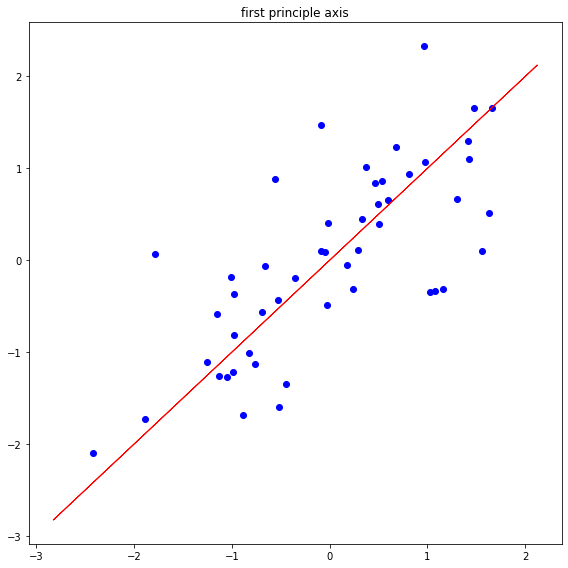

In [113]:
first_principal_axis(n_feature)

***

### 4. plot the second principal axis in red on the normalized data in blue

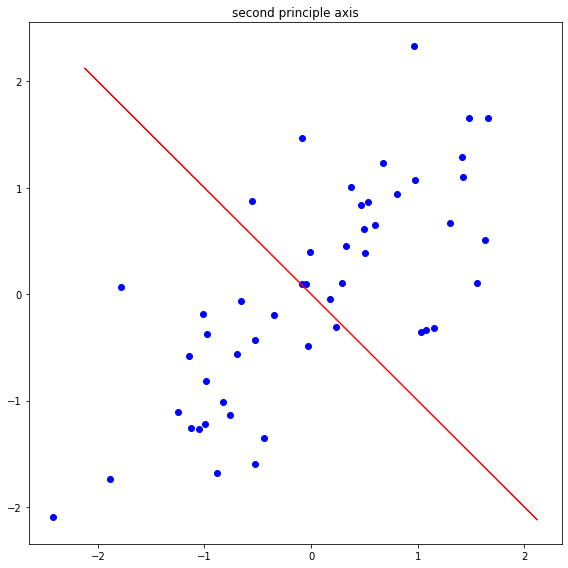

In [114]:
second_principal_axis(n_feature)

***

### 5. plot the projection of data in green onto the first principal axis in red

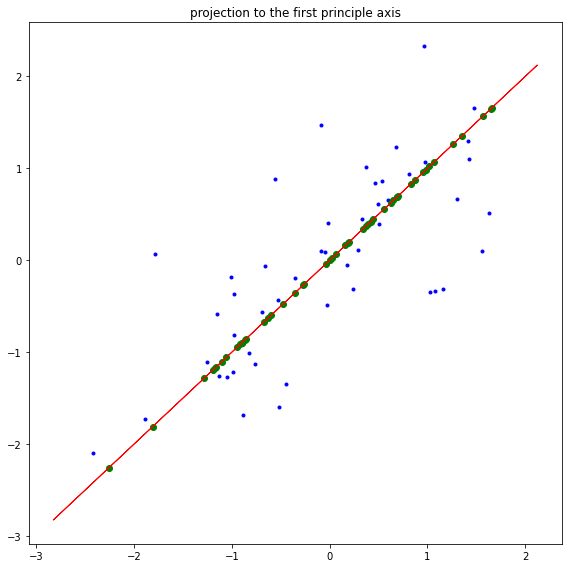

In [115]:
projection_to_the_first_principal_axis(n_feature)

***

### 6. plot the projection of data in green onto the second principal axis in red

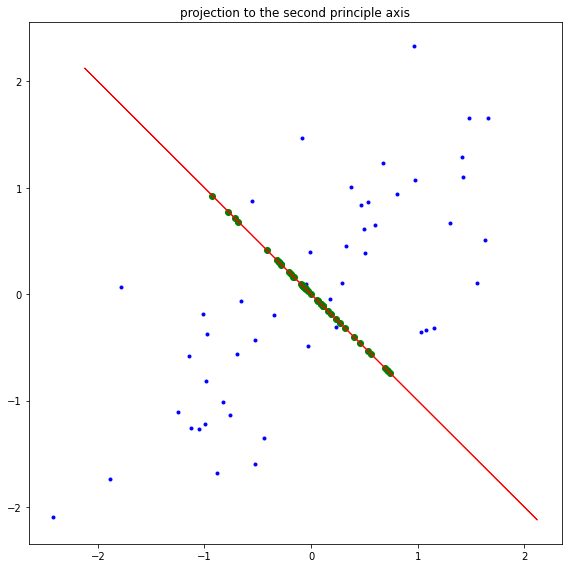

In [116]:
projection_to_the_second_principal_axis(n_feature)

***

### 7. plot the projection line in grey onto the first principal axis

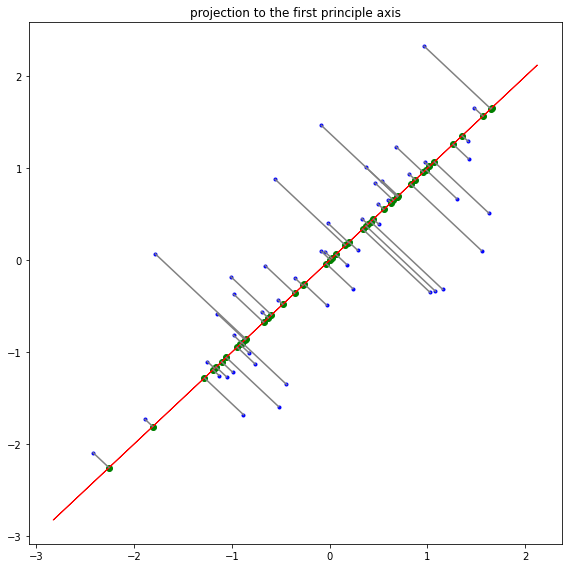

In [117]:
connect_original_data_to_the_projection_onto_the_first_principal_axis(n_feature)

***

### 8. plot the projection line in grey onto the second principal axis

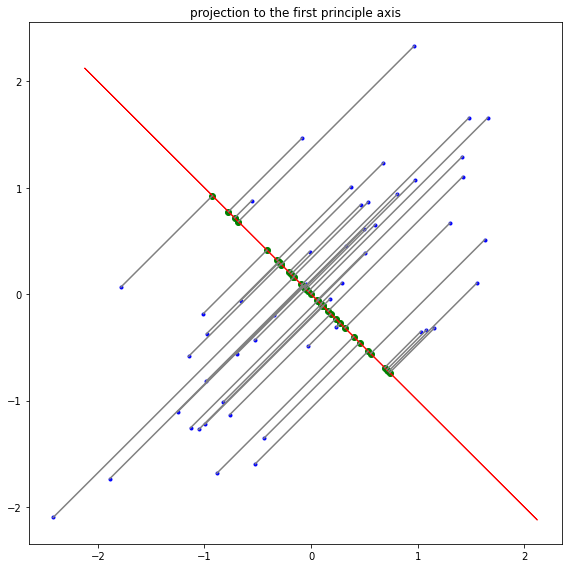

In [118]:
connect_original_data_to_the_projection_onto_the_second_principal_axis(n_feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***